In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('black_friday_train.csv')

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [10]:
df[['Marital_Status','City_Category']].groupby(['Marital_Status','City_Category']).size().reset_index()

,Marital_Status,City_Category,0
0,0,A,38517
1,0,B,58432
2,0,C,40858
3,1,A,24007
4,1,B,40134
5,1,C,31651


In [14]:
pd.get_dummies(df['Gender'] ,drop_first=True, dtype=int)

,M
0,1
1,1
2,0
3,0
4,0
...,...
233594,0
233595,0
233596,0
233597,0


## Handle all the categorical feature 

### Handling Gender

In [15]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [16]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,1,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,0,26-35,1,C,1,0,4,5.0,12.0


### Handling Age
Applying dummies will not be a good choice here 

In [17]:
df['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [18]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [19]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,5,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,1,3,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,0,4,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,0,4,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,0,3,1,C,1,0,4,5.0,12.0


### Handling City_Category

In [22]:
df_city = pd.get_dummies(df['City_Category'],dtype=int,drop_first=True)

In [23]:
df = pd.concat([df , df_city] ,axis=1)

In [24]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1000004,P00128942,1,5,7,B,2,1,1,11.0,NaN,1,0
1,1000009,P00113442,1,3,17,C,0,0,3,5.0,NaN,0,1
2,1000010,P00288442,0,4,1,B,4+,1,5,14.0,NaN,1,0
3,1000010,P00145342,0,4,1,B,4+,1,4,9.0,NaN,1,0
4,1000011,P00053842,0,3,1,C,1,0,4,5.0,12.0,0,1


In [26]:
df.drop('City_Category',axis=1,inplace=True)

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1000004,P00128942,1,5,7,2,1,1,11.0,NaN,1,0
1,1000009,P00113442,1,3,17,0,0,3,5.0,NaN,0,1
2,1000010,P00288442,0,4,1,4+,1,5,14.0,NaN,1,0
3,1000010,P00145342,0,4,1,4+,1,4,9.0,NaN,1,0
4,1000011,P00053842,0,3,1,1,0,4,5.0,12.0,0,1


In [28]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
B                                  0
C                                  0
dtype: int64

## Focus on replacing missing Values

In [29]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     27229
14.0    23726
2.0     21281
16.0    18432
15.0    16259
4.0     11028
5.0     10930
6.0      7109
11.0     6096
17.0     5784
13.0     4523
9.0      2484
12.0     2273
10.0     1377
18.0     1257
3.0      1239
7.0       228
Name: count, dtype: int64

Replace the missing Values with Mode

In [31]:
df['Product_Category_2'].mode()[0]

np.float64(8.0)

In [32]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [33]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [35]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     99573
14.0    23726
2.0     21281
16.0    18432
15.0    16259
4.0     11028
5.0     10930
6.0      7109
11.0     6096
17.0     5784
13.0     4523
9.0      2484
12.0     2273
10.0     1377
18.0     1257
3.0      1239
7.0       228
Name: count, dtype: int64

In [37]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [38]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [39]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
B                             0
C                             0
dtype: int64

<Axes: >

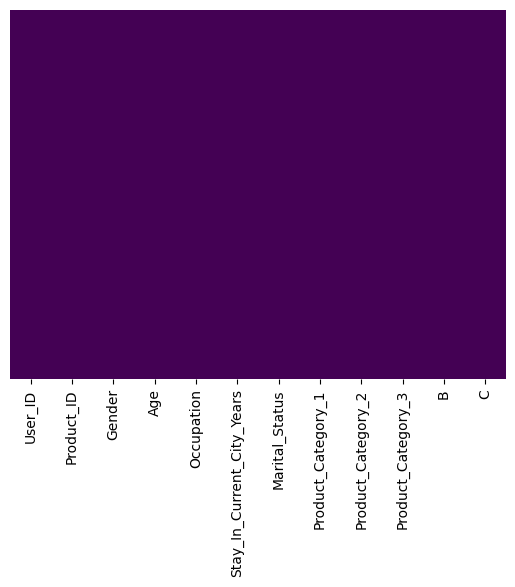

In [40]:
sns.heatmap(df.isnull() , yticklabels=False , cbar = False , cmap = 'viridis')


### Handling Stay for current years

In [41]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [44]:
df['Stay_In_Current_City_Years'] =df['Stay_In_Current_City_Years'].str.replace('+','')

In [45]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1000004,P00128942,1,5,7,2,1,1,11.0,16.0,1,0
1,1000009,P00113442,1,3,17,0,0,3,5.0,16.0,0,1
2,1000010,P00288442,0,4,1,4,1,5,14.0,16.0,1,0
3,1000010,P00145342,0,4,1,4,1,4,9.0,16.0,1,0
4,1000011,P00053842,0,3,1,1,0,4,5.0,12.0,0,1


### Convert Stay_In_Current_City_Years to Integer

In [46]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  int64  
 3   Age                         233599 non-null  int64  
 4   Occupation                  233599 non-null  int64  
 5   Stay_In_Current_City_Years  233599 non-null  int64  
 6   Marital_Status              233599 non-null  int64  
 7   Product_Category_1          233599 non-null  int64  
 8   Product_Category_2          233599 non-null  float64
 9   Product_Category_3          233599 non-null  float64
 10  B                           233599 non-null  int64  
 11  C                           233599 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 21.4+ MB


<Figure size 10000x2000 with 0 Axes>

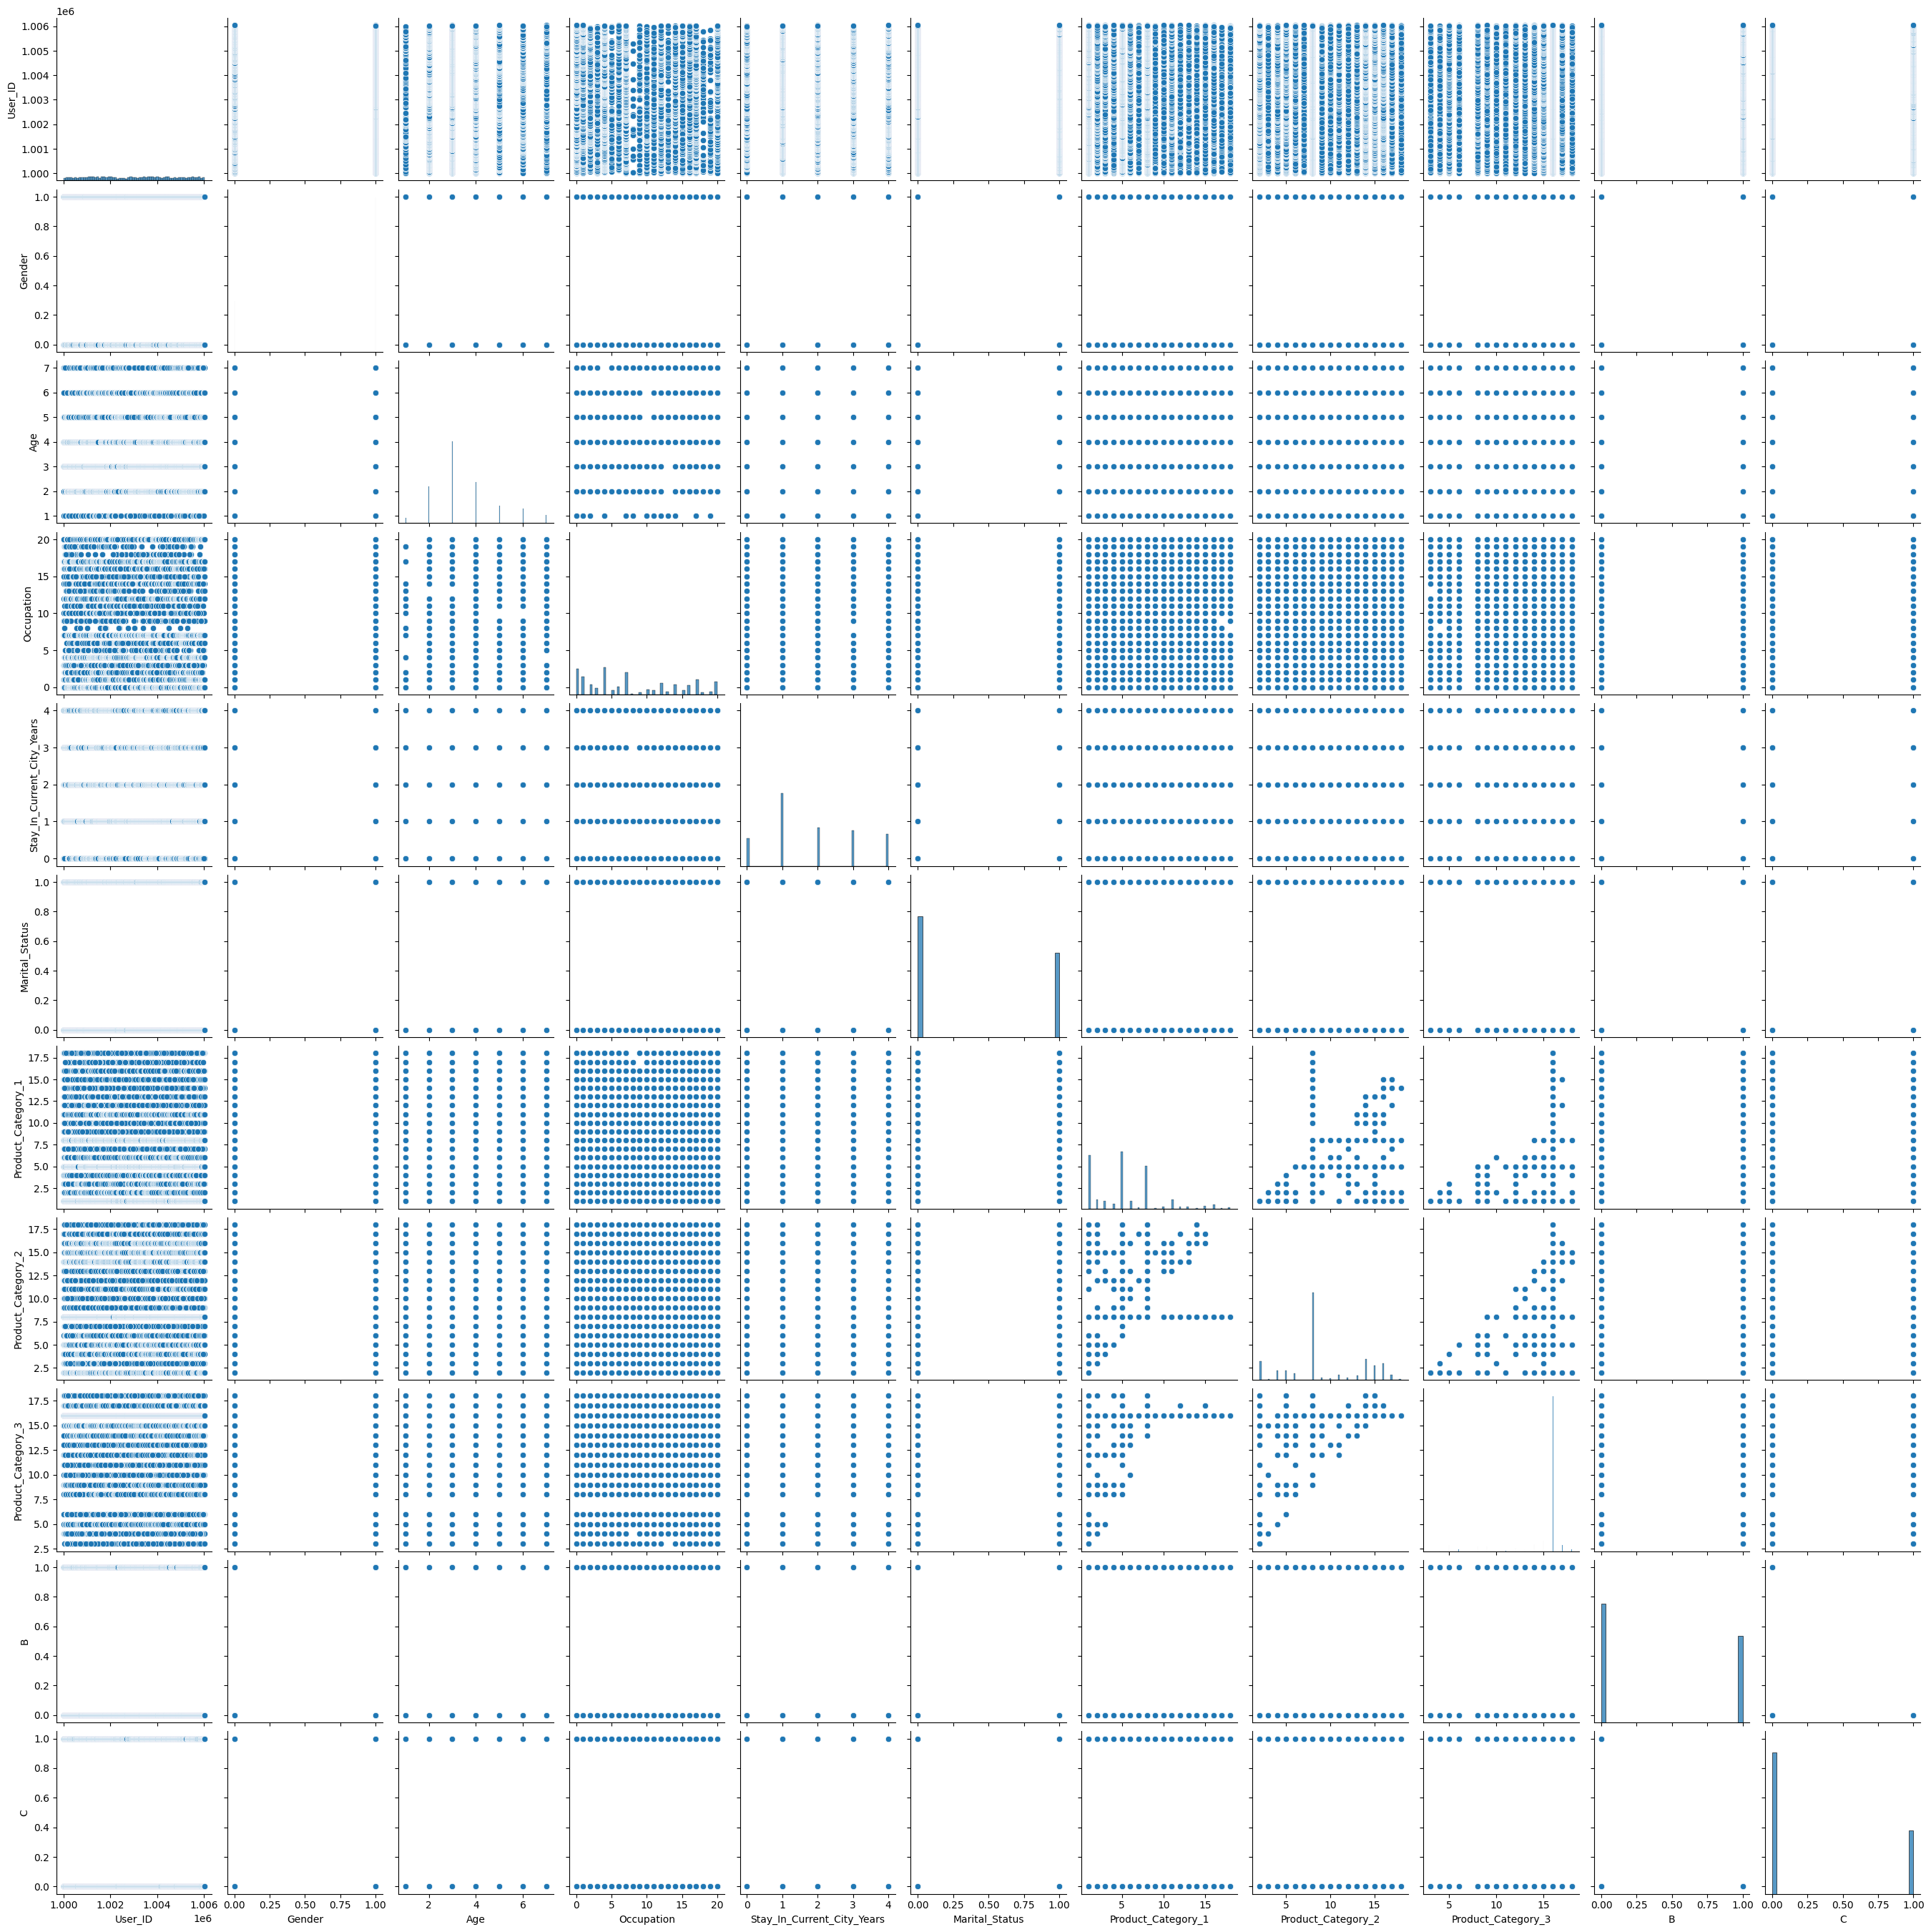

In [49]:
plt.figure(figsize=(100,20))
sns.pairplot(df)